In [1]:
# https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022?resource=download&sort=votes

# The Dataset

Contains about 60,000 Spotify reviews with ratings from 2022. The authors of this dataset scraped Google Play store for reviews. First, let's get an overview of the dataset then we'll dig into the sentiment analysis.

In [2]:
import pandas as pd
spotify_reviews = pd.read_csv('reviews.csv')
spotify_reviews

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [3]:
spotify_reviews['Rating'].dtype

dtype('int64')

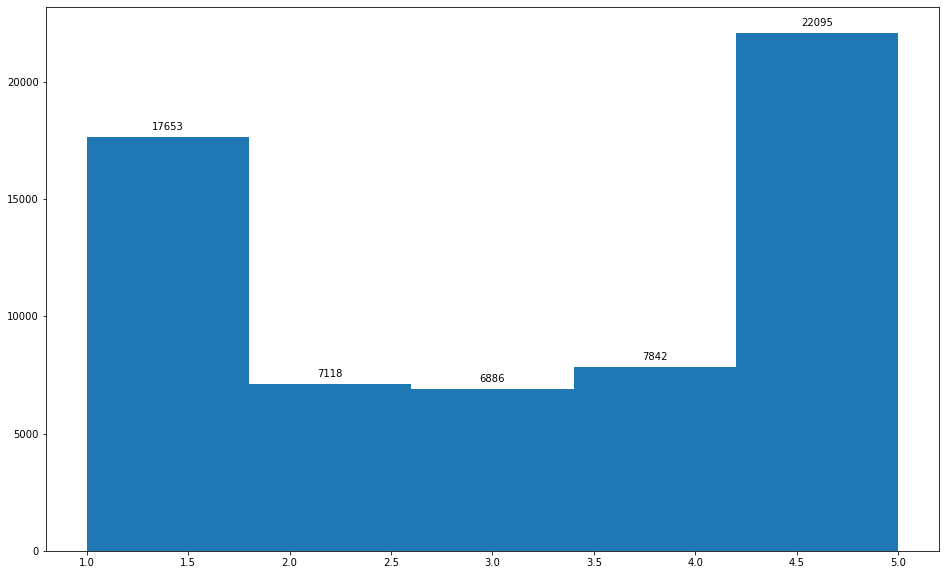

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(spotify_reviews['Rating'], bins=5, density=False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

In [5]:
# convert to ratings to string so they are treated as categorical variables
spotify_reviews['Rating'] = spotify_reviews.Rating.astype(str)
spotify_reviews['Rating'].dtype

dtype('O')

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
X = spotify_reviews['Review']
y = spotify_reviews['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
X_train

39877    A nice app,the features attracted me such as t...
5907     Awesome but a bit two many commercials I don't...
41920    Super slow, can take several minutes to open, ...
686      Best music app ever, I used to spend 100 bucks...
28741                          Nice to find such a variety
                               ...                        
54343    Love the app, but if yall get rid of jr (atlea...
38158    I really enjoy Spotify it has many songs and p...
860      Hi, I changed my account to 2 accounts, the mo...
15795    I love this app, personally I have the premium...
56422    I like the old classic songs Is very easy to g...
Name: Review, Length: 46195, dtype: object

In [8]:
y_train

39877    5
5907     5
41920    1
686      5
28741    5
        ..
54343    5
38158    5
860      1
15795    5
56422    4
Name: Rating, Length: 46195, dtype: object

In [9]:
X_test

37326    What is going on, Spotify? Nothing will play n...
50640    Music that's matched to me, spot on!!!!! Thank...
27630                   Lots of bugs in the latest version
42850    Damn, Spotify used to be an amazing streaming ...
10950    Never have been annoyed in my entire life than...
                               ...                        
38222    Keeps pausing FIX IT, WE PAY TOO MUCH TO HAVE ...
15074                              It does not work at all
35824    Spotify...... please read the many many commen...
20631    Every song is in here and every Artis this the...
447                     Great app brilliant music the best
Name: Review, Length: 15399, dtype: object

In [10]:
y_test

37326    2
50640    5
27630    5
42850    1
10950    5
        ..
38222    1
15074    1
35824    1
20631    5
447      5
Name: Rating, Length: 15399, dtype: object

In [11]:
import wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [12]:
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

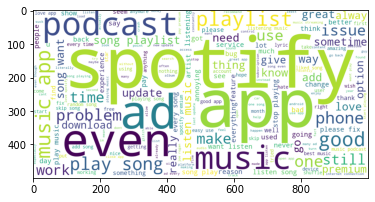

In [13]:
corpus = text_transformation(spotify_reviews['Review'])
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)
# wordcloud of the dataset

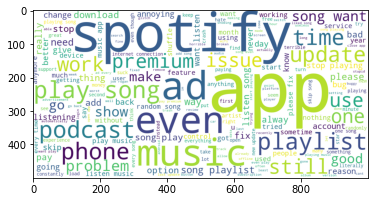

In [14]:
corpus = text_transformation(spotify_reviews['Review'][spotify_reviews['Rating'] == '1'])
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)
# wordcloud for reviews with rating of 1

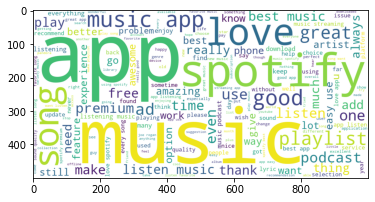

In [15]:
corpus = text_transformation(spotify_reviews['Review'][spotify_reviews['Rating'] == '5'])
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)
# wordcloud for reviews with rating of 5

In [16]:
X_train

39877    A nice app,the features attracted me such as t...
5907     Awesome but a bit two many commercials I don't...
41920    Super slow, can take several minutes to open, ...
686      Best music app ever, I used to spend 100 bucks...
28741                          Nice to find such a variety
                               ...                        
54343    Love the app, but if yall get rid of jr (atlea...
38158    I really enjoy Spotify it has many songs and p...
860      Hi, I changed my account to 2 accounts, the mo...
15795    I love this app, personally I have the premium...
56422    I like the old classic songs Is very easy to g...
Name: Review, Length: 46195, dtype: object

In [17]:
train_corpus = text_transformation(X_train)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(train_corpus)
X_train = traindata
X_train

<46195x267197 sparse matrix of type '<class 'numpy.int64'>'
	with 1303279 stored elements in Compressed Sparse Row format>

In [20]:
test_corpus = text_transformation(X_test)
testdata = cv.transform(test_corpus)
X_test = testdata
X_test

<15399x267197 sparse matrix of type '<class 'numpy.int64'>'
	with 369662 stored elements in Compressed Sparse Row format>

In [21]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train[:1000],y_train[:1000])
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 1000}

In [23]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_split=15, n_estimators=1000)

In [24]:
predictions = rfc.predict(X_test)

In [27]:
pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

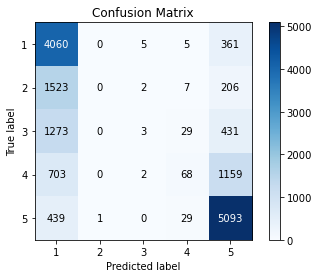

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test,predictions)



In [50]:
# perform oversampling with SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train, y_train

(<82665x267197 sparse matrix of type '<class 'numpy.int64'>'
 	with 2601568 stored elements in Compressed Sparse Row format>,
 0        5
 1        5
 2        1
 3        5
 4        5
         ..
 82660    4
 82661    4
 82662    4
 82663    4
 82664    4
 Name: Rating, Length: 82665, dtype: object)

In [53]:
y_train[0]

'5'

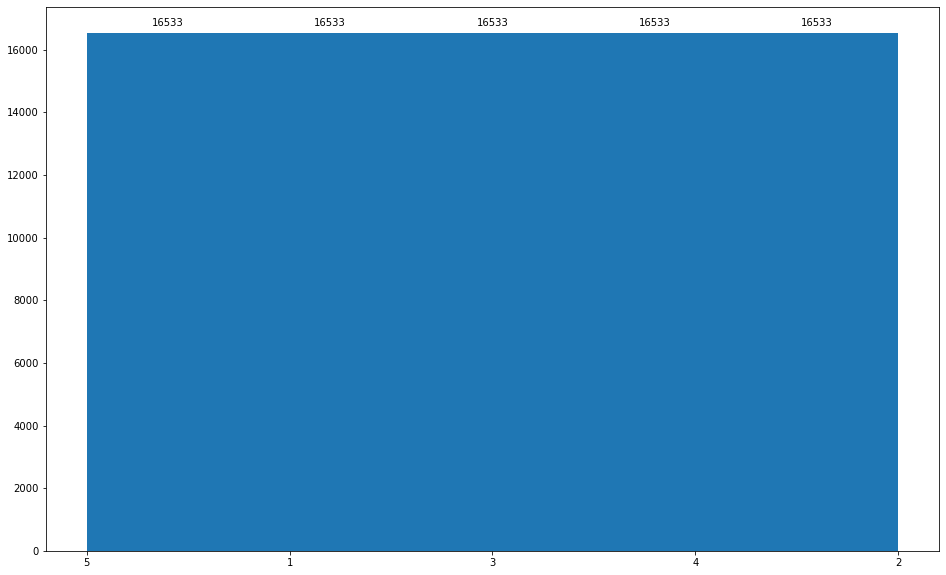

In [55]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(y_train, bins=5, density=False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
# all classes now have the same number of samples

In [56]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_split=15, n_estimators=1000)

In [57]:
predictions = rfc.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

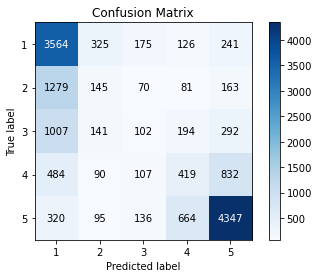

In [58]:
plot_confusion_matrix(y_test,predictions)